<a href="https://colab.research.google.com/github/mbron64/CS550_Lab4/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def linear_forward(X, W):
    """
    Computes the forward pass for a linear transformation.

    Consider a linear layer that accepts inputs with D features,
    and has M neurons.  Assume that our minibatch size
    is N.  In other words, we wish to process N samples at once.

    The input X has shape (N, D) and contains a minibatch of N
    samples, where each sample X[i] has shape (D).  Each sample
    will be transformed to an output vector of dimension M.

    Inputs:
    - X: A numpy array containing input data, of shape (N, D)
    - W: A numpy array of weights, of shape (D+1, M)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (X, W)

    The returned (X, W) is redundant, but makes the training code
    more concise.

    """

    out = None # Initialize the out variable.

    #
    # PUT YOUR CODE BELOW: Below, implement the linear forward pass. Store the result in out.
    # Make sure to do the bias trick!
    #


    # The lines below do not need to be changed.


    out = None

    #column of ones to X for the bias trick
    X_augmented = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

    #forward pass
    out = np.dot(X_augmented, W)

    #cache for backward pass
    cache = (X, W)

    return out, cache

In [7]:
def linear_backward(d_upstream, cache):
    """
    Computes the backward pass for an linear layer.

    Inputs:
    - d_upstream: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - X: Input data, of shape (N, D)
      - W: Weights, of shape (D+1, M)

    Returns a tuple of:
    - dX: Gradient of the output of this layer with respect to X, of shape (N, D).
          This is the downstream gradient.
    - dW: Gradient with respect to W, of shape (D+1, M)
    """
    X, W = cache
    dX, dW = None, None

    # PUT YOUR CODE BELOW: Implement the linear backward pass by calculating the
    # gradient with respect to the cached inputs X and W. Store them in the
    # variables dX and dW.



    # The lines below do not need to be changed.

    # For the backward pass, we need to consider that we used the bias trick
    # in the forward pass by augmenting X with a column of ones

    #compute dX without the bias column
    dX = np.dot(d_upstream, W[:-1, :].T)

    # Augmented X with ones column for bias
    X_augmented = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

    #Compute dW
    dW = np.dot(X_augmented.T, d_upstream)

    return dX, dW

In [6]:
def finite_difference_linear(d_upstream, cache, h):
    '''
    Computes the numerical gradient for a linear layer

    Inputs:
    - d_upstream: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - X: Input data, of shape (N, D)
      - W: Weights, of shape (D+1, M)
    - h: The h to use in the finite difference.

    Returns a tuple of:
    - dX: Gradient with respect to X, of shape (N, D).  This is the downstream
          gradient.
    - dW: Gradient with respect to W, of shape (D+1, M)
    '''

    dX = None
    dW = None

    # PUT YOUR CODE BELOW: Implement the finite difference for the linear
    # function.  Return the gradient at input (X,W) w.r.t to x and w.
    X, W = cache
    dX = np.zeros_like(X)
    dW = np.zeros_like(W)

    #compute output Y given X and W
    def compute_output(X, W):
        X_augmented = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        return np.dot(X_augmented, W)

    #compute dX using finite difference
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            #copy of positive and negative perturbations
            X_plus = X.copy()
            X_minus = X.copy()

            #apply perturbations
            X_plus[i, j] += h
            X_minus[i, j] -= h

            #compute outputs with perturbations
            Y_plus = compute_output(X_plus, W)
            Y_minus = compute_output(X_minus, W)

            #compute finite difference and multiply by gradients
            local_gradient = (Y_plus - Y_minus) / (2 * h)
            dX[i, j] = np.sum(local_gradient * d_upstream)

    #compute dW using finite difference
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            #copies of positive and negative perturbations
            W_plus = W.copy()
            W_minus = W.copy()

            #apply perturbations
            W_plus[i, j] += h
            W_minus[i, j] -= h

            #compute outputs with perturbations
            Y_plus = compute_output(X, W_plus)
            Y_minus = compute_output(X, W_minus)

            #compute finite difference and multiply by gradients
            local_gradient = (Y_plus - Y_minus) / (2 * h)
            dW[i, j] = np.sum(local_gradient * d_upstream)

    # The lines below do not need to be changed.
    return dX, dW

In [9]:
def gradient_check_linear():
    N = 16
    D = 4
    C = 3

    test_weight = np.random.random((D+1, C))
    test_input = np.random.random((N, D))
    dout = np.random.random((N, C))

    cache = (test_input, test_weight)

    grad_x_numerical, grad_w_numerical = finite_difference_linear(dout, cache, 1E-9)
    grad_x_analytical, grad_w_analytical = linear_backward(dout, cache)

    check_input_gradient = np.allclose(grad_x_numerical, grad_x_analytical)
    check_weight_gradient = np.allclose(grad_w_numerical, grad_w_analytical)

    if not check_input_gradient:
        print("The gradient with respect to x failed")

    if not check_weight_gradient:
        print("The gradient respect to w failed")
    print()
    print("gradient check for linear passed!")

gradient_check_linear()


gradient check for linear passed!


Part 2


In [10]:
# Loads and parses CSV file.
# Each image is a row in the CSV file.  The first column is the label,
# while the rest of the row is the image, stretched out.
# Returns a 2-D array containing the images, and a 1-D array
# with the labels.  In the image array,
# each row is an image.  Pixel values are from 0 to 255.
def mnist_data_parser_helper(csv_file_name):
    X = []
    Y = []
    with open(csv_file_name,'r') as _file:
        csv_reader = csv.reader(_file, delimiter=",")
        for row in csv_reader:
            Y.append(int(row[0])) # The label
            X.append([int(i) for i in row[1:]]) # The image.
    return (np.array(X, dtype='uint8'), np.array(Y, dtype='uint8'))

def get_mnist_train_data():
    X_train, Y_train = mnist_data_parser_helper("sample_data/mnist_train_small.csv")
    return X_train, Y_train

def get_mnist_test_data():
    X_test, Y_test = mnist_data_parser_helper("sample_data/mnist_test.csv")
    return X_test, Y_test

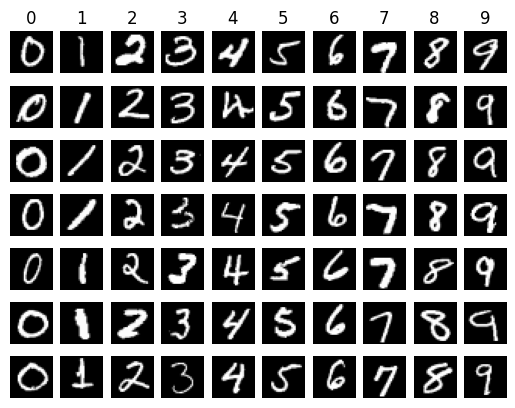

In [11]:
x_train, y_train = get_mnist_train_data()

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
num_classes = 10
samples_per_class = 7

for cls in range(num_classes):
    # Find the indices of all the digits that match cls.
    idxs = np.flatnonzero(y_train == cls)
    # Pick samples_per_class samples of those indices.
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i*num_classes + cls + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].reshape(28,28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

In [12]:

#▼ Run the following cell to gather the training and testing dataset.

x_train, y_train = get_mnist_train_data()  # Get the training dataset
x_test, y_test = get_mnist_test_data()     # Get the test dataset

In [13]:
#▼ Run the following to normalize the input dataset to have a mean of 0 and standard deviation of 1.

x_mean = x_train.mean()
x_std = x_train.std()

x_train = (x_train - x_mean)/(x_std)
x_test = (x_test - x_mean)/(x_std)


In [17]:
#▼ Run the following cell to check the dimensions of the data.

N, dim = x_train.shape
N_test, _ = x_test.shape
print(f"Number of training sample {N} with {dim} pixels per image")
print(f"Number of training sample {N_test} with {dim} pixels per image")



Number of training sample 20000 with 784 pixels per image
Number of training sample 10000 with 784 pixels per image


In [19]:
#► Put code in the following cell to split the x_train and y_train arrays to training and validations sets with an 80-20 split ratio. Place the split arrays in to the DATA dictionary. This dictionary will be used to feed data into the Solver.

# Perform training and validation dataset splits

# PUT YOUR CODE BELOW

#calculate split index
num_train = len(x_train)
num_val = int(0.2 * num_train)  # 20% for validation
indices = np.random.permutation(num_train)  # Shuffle indices

#split for training and validation
train_idx = indices[num_val:]  # 80% for training
val_idx = indices[:num_val]    # 20% for validation

#create data splits
DATA = {
    "X_train": x_train[train_idx],
    "X_val": x_train[val_idx],
    "y_train": y_train[train_idx],
    "y_val": y_train[val_idx]
}